In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Download resource NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/sentiment-analysis-amazon-product-reviews/Amazon-Product-Reviews - Amazon Product Review (1).csv
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [141]:
data = pd.read_csv('/kaggle/input/sentiment-analysis-amazon-product-reviews/Amazon-Product-Reviews - Amazon Product Review (1).csv')

In [142]:
# Langkah 2: Eksplorasi Data
print("Preview Dataset:")
print(data.head())
print("\nInfo Dataset:")
print(data.info())
print("\nDistribusi Sentimen:")
print(data['sentiment'].value_counts())

Preview Dataset:
  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     11555559  R1QXC7AHHJBQ3O  B00IKPX4GY         2693241   
1          US     31469372  R175VSRV6ZETOP  B00IKPYKWG         2693241   
2          US     26843895  R2HRFF78MWGY19  B00IKPW0UA         2693241   
3          US     19844868   R8Q39WPKYVSTX  B00LCHSHMS         2693241   
4          US      1189852  R3RL4C8YP2ZCJL  B00IKPZ5V6         2693241   

                           product_title product_category  star_rating  \
0  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   
1  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            3   
2  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   
3  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            4   
4  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   

   helpful_votes  total_votes vine verified_purchase  \
0              0            0    N   

In [143]:
# Langkah 3: Preprocessing Data
# Gabungkan review_headline dan review_body
data['review_text'] = data['review_headline'] + " " + data['review_body']

# Fungsi untuk membersihkan teks
# Inisialisasi stopwords dan lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Fungsi preprocessing
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus karakter spesial & angka
    tokens = word_tokenize(text)  # Tokenisasi
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatizing
    return ' '.join(tokens)  # Gabungkan kembali

# Terapkan ke dataset
data['cleaned_review'] = data['review_text'].astype(str).apply(preprocess_text)

# Cek hasil
print(data[['review_text', 'cleaned_review']].head())



                                         review_text  \
0                           Five Stars Great love it   
1  Lots of ads Slow processing speed Occasionally...   
2  Well thought out device Excellent unit.  The v...   
3  Not all apps/games we were looking forward to ...   
4  Five Stars All Amazon products continue to mee...   

                                      cleaned_review  
0                               five star great love  
1  lot ad slow processing speed occasionally shut...  
2  well thought device excellent unit versatility...  
3  appsgames looking forward using compatible tab...  
4  five star amazon product continue meet expecta...  


In [144]:
# Langkah 4: Feature Extraction dengan TF-IDF
tfidf = TfidfVectorizer(max_features=1000)  # Kurangi jumlah fitur
X = tfidf.fit_transform(data['cleaned_review']).toarray()
y = data['sentiment']  # Kolom target

In [145]:
# Langkah 5: Split Data menjadi Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Langkah 6: Train Model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [147]:
# Langkah 7: Evaluasi Model
y_pred = model.predict(X_test)

print("\nEvaluasi Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Evaluasi Model:
Accuracy: 0.9280388978930308

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1018
           1       0.95      0.97      0.96      5152

    accuracy                           0.93      6170
   macro avg       0.88      0.85      0.86      6170
weighted avg       0.93      0.93      0.93      6170


Confusion Matrix:
[[ 735  283]
 [ 161 4991]]


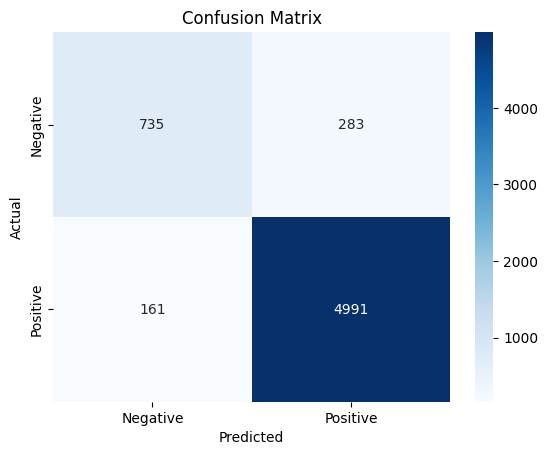

In [148]:
# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [149]:
# Langkah 8: Contoh Prediksi
def predict_sentiment(text):
    text = preprocess_text(text)
    text_vector = tfidf.transform([text]).toarray()
    prediction = model.predict(text_vector)
    return "Positive" if prediction[0] == 1 else "Negative"

In [150]:
# Test dengan contoh ulasan
test_review = "This product is amazing! I love it."
print(f"\nSentimen dari ulasan '{test_review}': {predict_sentiment(test_review)}")

test_review = "This is the worst product I have ever bought."
print(f"Sentimen dari ulasan '{test_review}': {predict_sentiment(test_review)}")


Sentimen dari ulasan 'This product is amazing! I love it.': Positive
Sentimen dari ulasan 'This is the worst product I have ever bought.': Negative
